In [1]:
import dill
from main.manipulation import Manipulation
from main.data_processing import evaluate_profile
import pandas as pd
import numpy as np
from main.manipulation_utils import get_children_generation_options, check_transitivity, one_cost_children_generation, useful_change
from IPython.display import display
from copy import copy
from matplotlib import pyplot as plt
import seaborn as sns

# variables we need to keep during datapoints generation
- num of rounds for convergence (per profile and random_run)
- converged or not (per round and profile and random_run)
- winner (per round to be safe, although we actually need only at round 0 (truthful winner) and at final round) (per round and profile and random_run)

## data load and set-up

In [16]:
with open('data/profile_manual_example_4.pkl', 'rb') as f:
    all_preferences = dill.load(f)

In [3]:
alphabetical_order = {}
for i in all_preferences[0].index:
    alphabetical_order[i] = i

cost_of_voter_pref = 0
k=1
method='approval'

# iteration

In [4]:
%pdb

Automatic pdb calling has been turned ON


In [5]:
def select_new_random_voter(failed, total_num, voter_to_exclude):
    if voter_to_exclude is not None:
        set_to_select_from = [x for x in range(total_num) if x not in failed and x!=voter_to_exclude]
    else:
        set_to_select_from = [x for x in range(total_num) if x not in failed]
    if len(set_to_select_from)==0:
        return None
    else:
        return set_to_select_from[np.random.randint(len(set_to_select_from))]

In [6]:
cycle_limit=15

In [7]:
convergence_rounds = []
for meta_counter in range(500):
    
    current_profile = copy(all_preferences) # Initialize the current profile of preferences for all voters.to be the same as the truthful profile.
    num_rounds = 0
    failed_manipulators = []
    manipulator_voter=None

    while True:
        random_voter = select_new_random_voter(failed_manipulators, len(all_preferences), manipulator_voter)
        if random_voter is None:
            print(f'Convergence is achieved in {num_rounds} rounds!')
            convergence_rounds.append(num_rounds)
            break
        else:
            pass
#             print(f'\nRandom voter chosen: {random_voter}')

        winner, possible_winners, scores_of_alternatives = evaluate_profile(graphs=current_profile, k=k, method=method, alphabetical_order=alphabetical_order)

        man = Manipulation(
            all_preferences=current_profile,
            preference_idx=random_voter,
            absolute_cost_of_preference=cost_of_voter_pref,
            winner=winner,
            truthful_profile=all_preferences,
            possible_winners=possible_winners,
            scores_of_alternatives=scores_of_alternatives,
            alphabetical_order_of_alternatives=alphabetical_order,
            method=method,
            k=k,
            do_additions=True,
            do_omissions=True,
            do_flips=True,
            verbose=False
        )

        result = man.manipulation_move()
        if result is not None:
            current_profile, _ = result
            num_rounds+=1
            if num_rounds > cycle_limit:
                print(f'No convergence for {cycle_limit} rounds. Assumed a cycle.')
                continue
            manipulator_voter=random_voter
        else:
#             print(f'Voter: {random_voter} cannot manipulate.')
            failed_manipulators.append(random_voter)

Convergence is achieved in 4 rounds!
Convergence is achieved in 6 rounds!
Convergence is achieved in 2 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 2 rounds!
Convergence is achieved in 6 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 2 rounds!
Convergence is achieved in 2 rounds!
Convergence is achieved in 2 rounds!
Convergence is achieved in 2 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 2 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 2 rounds!
Convergence is achieved in 5 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 5 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 5 rounds!
Convergence is achieved in 6 rounds!
C

Convergence is achieved in 3 rounds!
Convergence is achieved in 6 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 5 rounds!
Convergence is achieved in 5 rounds!
Convergence is achieved in 5 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 5 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 2 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 2 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 6 rounds!
Convergence is achieved in 2 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 6 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 4 rounds!
C

Convergence is achieved in 3 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 2 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 2 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 2 rounds!
Convergence is achieved in 6 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 2 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 2 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 3 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 4 rounds!
Convergence is achieved in 4 rounds!
C

In [10]:
np.mean(convergence_rounds)

3.714

In [11]:
np.std(convergence_rounds)

1.4086177622052052

/Users/panos/anaconda3/envs/iterative_voting/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

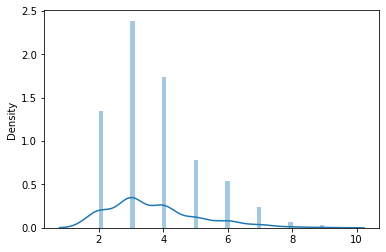

In [24]:
sns.distplot(convergence_rounds, bins=50)